Denoising Autoencoders (DAEs) are a type of neural network used for feature learning in unsupervised learning scenarios, including tasks like feature extraction in Kaggle competitions. Their primary goal is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction or feature learning.

### Basic Concept of Autoencoders:
Autoencoders are a type of artificial neural network used to learn efficient codings of unlabeled data. The network is trained to use input data to predict the same input data. They consist of two main parts:
1. **Encoder**: This part of the network compresses the input into a latent-space representation. It encodes the input data as an encoded representation in a reduced dimension.
2. **Decoder**: The decoder part of the network reconstructs the input data from the encoded representation.

### Denoising Autoencoders:
Denoising Autoencoders take this concept further by being designed to remove noise from the data. They work by:
1. **Adding Noise**: Initially, noise is added to the input data. This could be anything like random values added to the input features.
2. **Encoding**: The noisy data is then fed into the encoder which tries to extract and learn the important features while ignoring the noise.
3. **Decoding**: The decoder part of the network then attempts to reconstruct the original input from this noisy encoding, minus the added noise.

### How They Work in Feature Engineering:
1. **Robust Feature Learning**: By forcing the network to learn how to ignore the noise and reconstruct the inputs from corrupted data, DAEs learn to capture the more robust and stable features of the data.
2. **Dimensionality Reduction**: Like other autoencoders, DAEs can reduce the dimensionality of the data, which is useful in feature extraction and reducing the computational cost for training models.
3. **Handling Noisy Data**: They are particularly useful in real-world datasets which are often imperfect and contain noisy, incomplete, or erroneous data.

### Application in Kaggle Competitions:
In Kaggle competitions, where feature engineering is crucial, Denoising Autoencoders can be used to:
- Create robust features that can better generalize to unseen data, thereby improving the model's performance.
- Reduce the dimensionality of the dataset without losing significant information, making models more efficient and easier to train.
- Clean noisy datasets, which is common in real-world data used in competitions.

### Conclusion:
Denoising Autoencoders offer a powerful approach for feature engineering, especially in scenarios where the data is noisy or complex. By learning to extract the most important features from the data while ignoring irrelevant noise, they can significantly enhance the performance of machine learning models, which is a key factor in the success of Kaggle competition entries.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model


# Loading the MNIST dataset.
# Adding noise to the dataset.
# Building a DAE.
# Training the DAE.
# Using the DAE to denoise images.


Prepare the Dataset

In [4]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Function to add noise
def add_noise(x):
    noise_factor = 0.5
    x_noisy = x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x.shape) 
    x_noisy = np.clip(x_noisy, 0., 1.)
    return x_noisy

# Add noise to the data
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)


Building the Denoising Autoencoder

In [5]:
# Input layer
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Display the model architecture
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

Training the Autoencoder

In [9]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=3,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/3
235/235 [==============================] - 82s 347ms/step - loss: 0.1064 - val_loss: 0.1047
Epoch 2/3
235/235 [==============================] - 83s 353ms/step - loss: 0.1048 - val_loss: 0.1038
Epoch 3/3
235/235 [==============================] - 91s 390ms/step - loss: 0.1036 - val_loss: 0.1020


Denoising Images

313/313 [==============================] - 6s 19ms/step


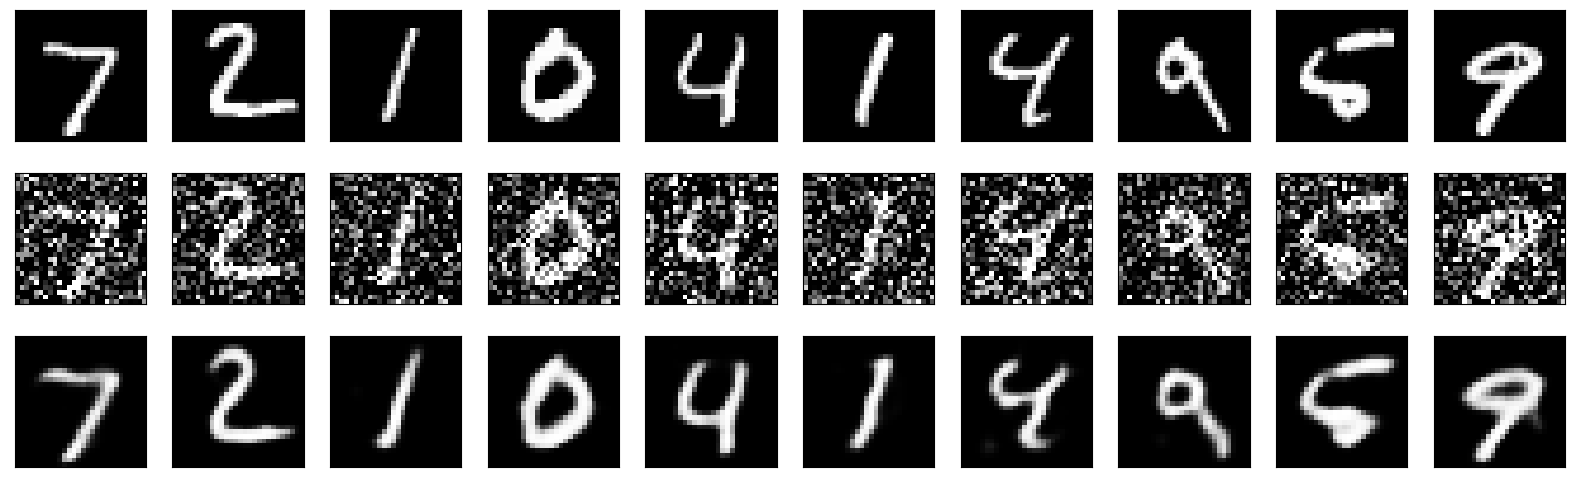

In [10]:
# Denoise test images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
